In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from newspaper import Article
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
# Read in both datasets
true = pd.read_csv('Dataset/True.csv')
fake = pd.read_csv('Dataset/Fake.csv')

# Adding new column 'label' to differentiate
# which article is 'Real' or 'Fake
true['label'] = 'Real'
fake['label'] = 'Fake'

In [138]:
# Let's combine both articles into a single
# dataframe
news = pd.concat([true, fake])
news['length'] = news['text'].apply(lambda x: len(x.split(' ')))


print('Real dataset length:',len(true), '\nFake dataset length:', len(fake))
print('Total length:', len(news))

Real dataset length: 21417 
Fake dataset length: 23481
Total length: 44898


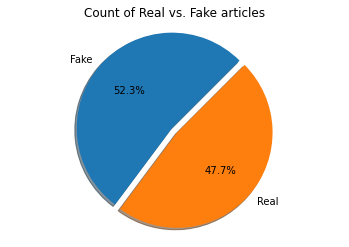

In [139]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fake', 'Real'
sizes = [len(fake), len(true)]
explode = (0, 0.07)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Count of Real vs. Fake articles')

plt.show()

In [140]:
# Get dataset info
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
 5   length   44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.4+ MB


In [141]:
# Print the first 5 rows
news.head()

,title,text,subject,date,label,length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real,753
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real,625
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real,466
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real,377
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real,864


In [142]:
# Separate dataset into training and testing
X_train, X_test, y_train, y_test=train_test_split(news['text'], news['label'], test_size=0.15, shuffle=True)

In [143]:
print('Total training set:', (len(X_train) + len(y_train)))
print('Total testing set:', (len(X_test) + len(y_test)))

Total training set: 76326
Total testing set: 13470


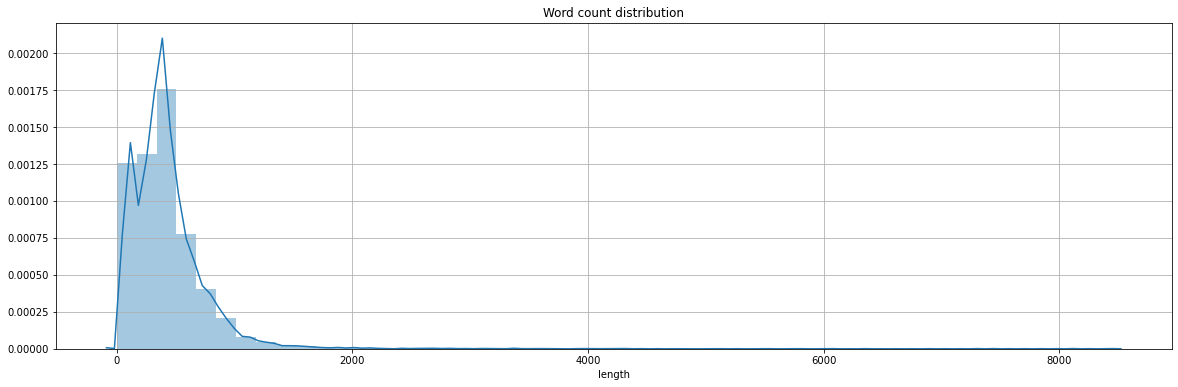

In [144]:
# Plot distribution of word count
fig, ax = plt.subplots(figsize = (20,6))

plt.title('Word count distribution')
plt.grid(True)
sns.distplot(news['length'])

In [145]:
# Grab characteristics of the dataset
print('Dataset characteristics')
news['length'].describe()

Dataset characteristics


count    44898.000000
mean       415.760412
std        361.648003
min          1.000000
25%        208.000000
50%        371.000000
75%        525.000000
max       8436.000000
Name: length, dtype: float64

In [146]:
# Initialize a TfidfVectorizer
vec = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
train = vec.fit_transform(X_train) 
test = vec.transform(X_test)

In [147]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(train, y_train)

# Predict on the test set and calculate accuracy
y_pred = pac.predict(test)
score = accuracy_score(y_test,y_pred)
print(f'Model accuracy: {score}')

print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Model accuracy: 0.9949517446176689
Classification Report : 

              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      3523
        Real       1.00      0.99      0.99      3212

    accuracy                           0.99      6735
   macro avg       0.99      0.99      0.99      6735
weighted avg       0.99      0.99      0.99      6735



In [149]:
# Build confusion matrix

# Note: How to interpret the output
# vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
# [True positives, False negatives]
# [False positives, True negatives]

print(confusion_matrix(y_test,y_pred, labels=['Fake','Real']))


[[3507   16]
 [  18 3194]]


### Website crawler section

In [150]:
# Let's grab an online article to test the model
sample = "https://www.nytimes.com/live/2022/04/21/world/ukraine-russia-war-news"

In [151]:
# Load, Download and Parse the article text
article = Article(sample)
article.download()
article.parse()

In [152]:
# Grab article text
sampleArticle = article.text

In [153]:
# Print an extract of the article.
# This is just to make sure the parser works
sampleArticle[:1000] + '...'

'President Vladimir V. Putin of Russia claimed victory in Mariupol on Thursday despite persistent fighting there, publicly calling off an assault on the final Ukrainian stronghold in the devastated city in a stark display of the Kremlin’s desire to present a success to the Russian public.\n\nMr. Putin ordered his defense minister, Sergei K. Shoigu, in a choreographed meeting shown on Russian television, not to storm the sprawling, fortress-like Azovstal steel mill complex where 2,000 Ukrainian fighters were said to be holed up, and instead to blockade the plant “so that a fly can’t get through.” That avoids, for now, a bloody battle in the strategic port city that would add to Russia’s mounting casualty toll and tie down troops who could be deployed to the broader battle for eastern Ukraine.\n\n“Of course, getting control of such an important center in the south as Mariupol is a success,” Mr. Putin was shown telling Mr. Shoigu, though the city is not yet fully under Russian control. “C

In [154]:
# Make a prediction whether the article is real or fake
y_pred=pac.predict(vec.transform([sampleArticle]))

In [155]:
# Print URL and final prediction result
print('Article URL:', sample)
print('Final prediction:', y_pred[0])

Article URL: https://www.nytimes.com/live/2022/04/21/world/ukraine-russia-war-news
Final prediction: Real
